In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv('./babyNamesUS.csv')
raw

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
...,...,...,...,...,...
1048570,FL,F,1993,Francis,8
1048571,FL,F,1993,Francisca,8
1048572,FL,F,1993,Gillian,8
1048573,FL,F,1993,Gisela,8


In [3]:
raw.head()

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [4]:
raw.tail()

,StateCode,Sex,YearOfBirth,Name,Number
1048570,FL,F,1993,Francis,8
1048571,FL,F,1993,Francisca,8
1048572,FL,F,1993,Gillian,8
1048573,FL,F,1993,Gisela,8
1048574,FL,F,1993,Gretchen,8


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   StateCode    1048575 non-null  object
 1   Sex          1048575 non-null  object
 2   YearOfBirth  1048575 non-null  int64 
 3   Name         1048575 non-null  object
 4   Number       1048575 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 40.0+ MB


In [11]:
#가장 흔한(많이 사용된) 이름 찾기
df = raw.pivot_table(index = 'Name', values = 'Number', aggfunc = 'sum')    #aggfunc : 어떤 값으로 합칠 것인지
df.sort_values(by = 'Number', ascending = False).head(10)

,Number
Name,
Michael,729890
James,696321
Robert,677403
John,673291
David,617946
Mary,520762
William,519198
Richard,383524
Christopher,379723


In [12]:
# 남자 여자 따로 Top 10
raw

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
...,...,...,...,...,...
1048570,FL,F,1993,Francis,8
1048571,FL,F,1993,Francisca,8
1048572,FL,F,1993,Gillian,8
1048573,FL,F,1993,Gisela,8


In [14]:
raw.pivot_table(index = ['Name', 'Sex'], values = 'Number', aggfunc = 'sum')

Number
Name   Sex        
Aadan  M        18
Aaden  M       855
Aadhav M        14
Aadhya F       188
Aadi   M       116
...            ...
Zyler  M        38
Zyon   F         6
       M        91
Zyra   F        23
Zyrah  F         5

[22798 rows x 1 columns]

In [15]:
raw.pivot_table(index = 'Name', columns = 'Sex', values = 'Number', aggfunc = 'sum')

Sex,F,M
Name,,
Aadan,NaN,18.0
Aaden,NaN,855.0
Aadhav,NaN,14.0
Aadhya,188.0,NaN
Aadi,NaN,116.0
...,...,...
Zylah,36.0,NaN
Zyler,NaN,38.0
Zyon,6.0,91.0


In [16]:
df = raw.pivot_table(index = 'Name', columns = 'Sex', values = 'Number', aggfunc = 'sum')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20815 entries, Aadan to Zyrah
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       14140 non-null  float64
 1   M       8658 non-null   float64
dtypes: float64(2)
memory usage: 487.9+ KB


In [17]:
name_list = ['Moon', 'Sun', 'Star', 'Mino', 'Son', 'Steve', 'Lucas', 'Young', 'Jessica']

In [18]:
# 남자 이름 Top10
# 여자 이름 Top10
df.sort_values(by = 'F', ascending = False).head(5)

Sex,F,M
Name,,
Mary,519443.0,1319.0
Jennifer,325383.0,773.0
Elizabeth,273414.0,607.0
Patricia,257008.0,476.0
Linda,249999.0,324.0


In [19]:
df['M']

Name
Aadan      18.0
Aaden     855.0
Aadhav     14.0
Aadhya      NaN
Aadi      116.0
          ...  
Zylah       NaN
Zyler      38.0
Zyon       91.0
Zyra        NaN
Zyrah       NaN
Name: M, Length: 20815, dtype: float64

In [20]:
df['F']

Name
Aadan       NaN
Aaden       NaN
Aadhav      NaN
Aadhya    188.0
Aadi        NaN
          ...  
Zylah      36.0
Zyler       NaN
Zyon        6.0
Zyra       23.0
Zyrah       5.0
Name: F, Length: 20815, dtype: float64

In [21]:
df[['M','F']]

Sex,M,F
Name,,
Aadan,18.0,NaN
Aaden,855.0,NaN
Aadhav,14.0,NaN
Aadhya,NaN,188.0
Aadi,116.0,NaN
...,...,...
Zylah,NaN,36.0
Zyler,38.0,NaN
Zyon,91.0,6.0


In [22]:
top_f_name = df.sort_values(by = 'F', ascending = False).head(10).index
top_f_name

Index(['Mary', 'Jennifer', 'Elizabeth', 'Patricia', 'Linda', 'Jessica',
       'Barbara', 'Sarah', 'Michelle', 'Ashley'],
      dtype='object', name='Name')

In [25]:
# F 값이 500보다 큰 행 찾기

cond = df['F'] > 500

In [26]:
df[cond]

Sex,F,M
Name,,
Aaliyah,15230.0,NaN
Aaron,502.0,114014.0
Abbey,1949.0,NaN
Abbie,2106.0,NaN
Abbigail,1327.0,NaN
...,...,...
Zoe,23549.0,24.0
Zoey,11975.0,NaN
Zoie,1381.0,NaN


In [30]:
name_list = ['Moon', 'Sun', 'Star', 'Mino', 'Son', 'Steve', 'Lucas', 'Young', 'Jessica']
cond = []
for name in df.index:
    if name in name_list:
        cond.append(True)
    else:
        cond.append(False)
df[cond]

Sex,F,M
Name,,
Jessica,247326.0,764.0
Lucas,5.0,35949.0
Moon,6.0,NaN
Son,NaN,170.0
Star,1238.0,NaN
Steve,41.0,48904.0
Sun,5.0,5.0
Young,11.0,203.0


In [31]:
raw['YearOfBirth'].unique()

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [33]:
# 영어이름 트랜트 살펴보기

raw.pivot_table(index = 'Name', columns = 'YearOfBirth', values = 'Number', aggfunc = 'sum')
# df.to_excel('./연도별영어이름.xlsx') #실행속도가 느려서 csv로 사용
df.to_csv('./연도별영어이름.csv', encoding = 'utf-8')    # 표준인 utf-8로 저장 하지만 excel로 열 경우 cp949로 변경 필요
# df.to_csv('./연도별영어이름.csv', encoding = 'utf-8-sig')
# df.to_csv('./연도별영어이름.csv', encoding = 'cp949')

In [34]:
raw['YearOfBirth'].unique()

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [35]:
year = 2017
year_group = str(year)[ :-1] + "0년대"
year_group

'2010년대'

In [36]:
year_group_list = []
for year in raw['YearOfBirth']:
    year_group = str(year)[ :-1] + "0년대"
    year_group_list.append(year_group)

In [39]:
raw['구간'] = year_group_list
raw

,StateCode,Sex,YearOfBirth,Name,Number,구간
0,AK,F,1910,Mary,14,1910년대
1,AK,F,1910,Annie,12,1910년대
2,AK,F,1910,Anna,10,1910년대
3,AK,F,1910,Margaret,8,1910년대
4,AK,F,1910,Helen,7,1910년대
...,...,...,...,...,...,...
1048570,FL,F,1993,Francis,8,1990년대
1048571,FL,F,1993,Francisca,8,1990년대
1048572,FL,F,1993,Gillian,8,1990년대
1048573,FL,F,1993,Gisela,8,1990년대


In [43]:
# 구간별 이름 사용/등록 횟수 비교
name_list = raw.pivot_table(index = 'Name', values ='Number', aggfunc = 'sum').sort_values(ascending = False).haed(10).index
name_list

TypeError: sort_values() missing 1 required positional argument: 'by'

In [47]:
df = raw.pivot_table(index = 'Name', columns = '구간', values = 'Number', aggfunc = 'sum')
cond = df.index.isin(name_list)
df_select = df[cond]
df_select

구간,1910년대,1920년대,1930년대,1940년대,1950년대,1960년대,1970년대,1980년대,1990년대,2000년대,2010년대
Name,,,,,,,,,,,
Jessica,NaN,NaN,20.0,331.0,898.0,3333.0,28690.0,109501.0,79029.0,22617.0,3671.0
Lucas,NaN,5.0,NaN,NaN,21.0,75.0,1440.0,3793.0,6192.0,12442.0,11986.0
Moon,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
Son,5.0,NaN,NaN,NaN,NaN,NaN,5.0,108.0,52.0,NaN,NaN
Star,NaN,NaN,NaN,13.0,67.0,79.0,188.0,191.0,230.0,337.0,133.0
Steve,548.0,830.0,1087.0,7192.0,12369.0,14302.0,3841.0,3510.0,3049.0,1759.0,458.0
Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
Young,NaN,7.0,11.0,5.0,NaN,5.0,28.0,69.0,89.0,NaN,NaN


In [44]:
! pip install seaborn

In [49]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns


# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path ).get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   


<AxesSubplot:xlabel='구간', ylabel='Name'>

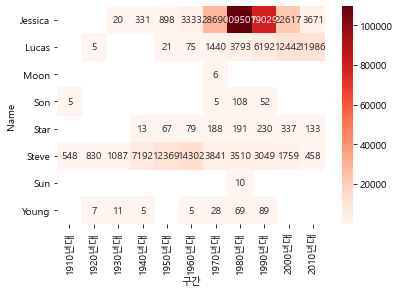

In [56]:
import seaborn as sns
sns.heatmap(data = df_select, annot = True, fmt = '.0f', cmap = 'Reds')